In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from matplotlib import gridspec

In [ ]:
#loading the data set
data=pd.read_csv("creditcard.csv")

In [ ]:
#understanding the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


In [ ]:
#imbalances
valid=data[data["Class"]==0]
fraud=data[data["Class"]==1]
data_outlier=len(fraud)/(float)(len(valid))
print("Outlier: ",data_outlier)
print("VALID TRANSACTIONS: ",valid)
print("FRAUD TRANSACTIONS: ",fraud)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

Outlier:  0.0017304750013189597
VALID TRANSACTIONS:              Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284315 rows x 31 columns]
FRAUD TRANSACTIONS:              Time        V1        V2  ...       V28  Amount  Class
541

In [ ]:
#total fraudulent transactions
print("Fraud Transactions: ") 
fraud.Amount.describe() 

Fraud Transactions: 


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
#total valid transaction
print("Valid Transactions: ") 
valid.Amount.describe() 

Valid Transactions: 


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

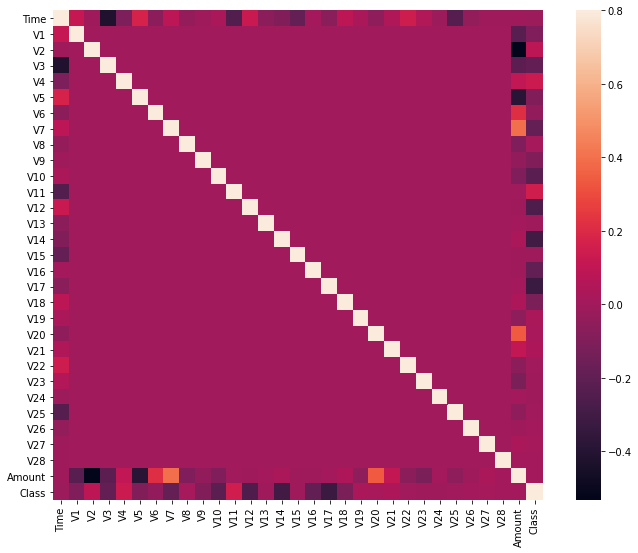

In [ ]:
# Correlation matrix 
corr_data=data.corr() 
data_fig=plt.figure(figsize = (12, 9)) 
sbn.heatmap(corr_data,vmax = .8,square = True) 
plt.show() 

In [ ]:
# dividing the X and the Y from the dataset 
x=data.drop(['Class'],axis = 1) 
y=data["Class"] 
print(x.shape) 
print(y.shape) 
x_data=x.values 
y_data=y.values

(284807, 30)
(284807,)


In [ ]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test=train_test_split( 
        x_data,y_data,test_size = 0.2,random_state = 42) 

In [ ]:
#Random forest model training
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
# predictions
y_pred=rfc.predict(x_test)

In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_outliers=len(fraud)
n_errors=(y_pred != y_test).sum()
print("The model used is Random Forest classifier")
accscore=accuracy_score(y_test, y_pred)
print("The accuracy is {}".format(accscore))
precscore=precision_score(y_test, y_pred)
print("The precision is {}".format(precscore))
recscore=recall_score(y_test, y_pred)
print("The recall is {}".format(recscore))
f1score = f1_score(y_test,y_pred)
print("The F1-Score is {}".format(f1score))
mathcoef= matthews_corrcoef(y_test, y_pred)
print("The Matthews correlation coefficient is{}".format(mathcoef))


The model used is Random Forest classifier
The accuracy is 0.9995962220427653
The precision is 0.9746835443037974
The recall is 0.7857142857142857
The F1-Score is 0.8700564971751412
The Matthews correlation coefficient is0.8749276812909632


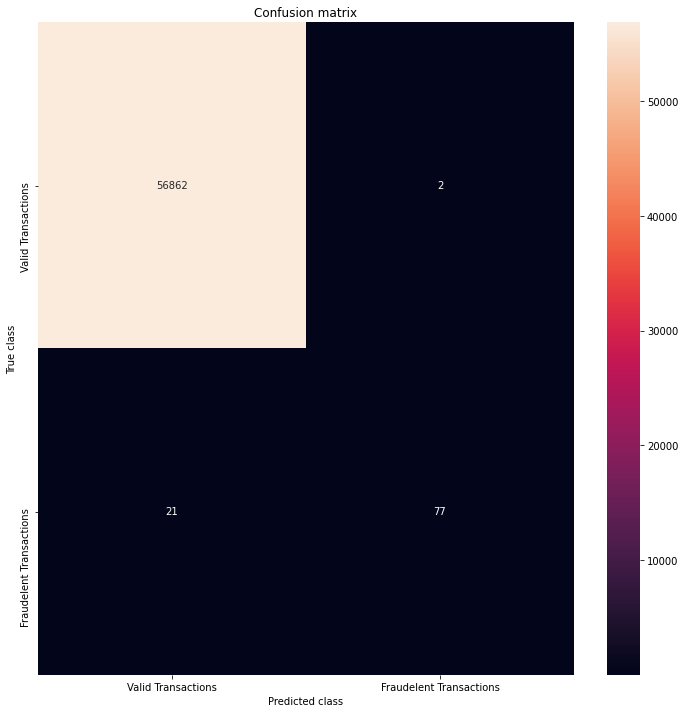

In [ ]:
# printing the confusion matrix
LABELS=['Valid Transactions', 'Fraudelent Transactions']
conf_matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sbn.heatmap(conf_matrix, xticklabels = LABELS,
yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
